In [66]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime
import datetime as dt

In [67]:
df = pd.read_csv('tute1.csv')
df.head(3)

,Unnamed: 0,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8


In [68]:
#Convert object to DATETIME
df["Month_toInt"] = list(map(lambda x: datetime.strptime(x, '%b-%y').strftime('%m-%Y'), df["Unnamed: 0"]))
sr = pd.to_datetime(df['Month_toInt'])
df['Month'] = pd.DataFrame(sr)
df = df.drop(['Unnamed: 0','Month_toInt', 'AdBudget', 'GDP'], axis=1)
df = df.set_index('Month')
df.head()

,Sales
Month,
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7


### Visualisasi Data Sales

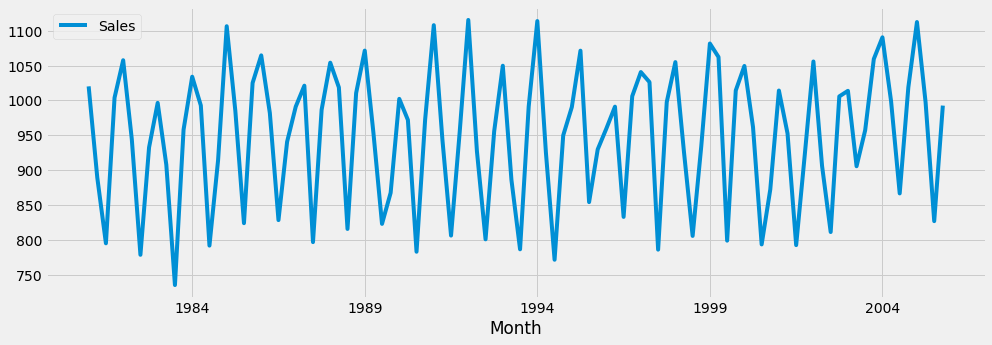

In [69]:
y = df
y.plot(figsize=(15, 5))
plt.show()

In [70]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA…')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA…
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [71]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1641.1673227026513
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1447.5722518427604
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:979.4794779587473
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:809.1355632140808
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:990.8046792516087
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:942.4977139170591
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:835.9996983143368
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:810.3656043846405
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1514.9897489142215
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1248.2377491975935
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:966.4387035282559
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:798.5643836787575
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:993.9172102293487
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:932.5185732158889
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:837.7045671323276
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:800.034973262393
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1246.6998057861383
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1055.8612340984812
ARIMA

In [72]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8704      0.075    -11.599      0.000      -1.018      -0.723
ma.S.L12      -1.0001    828.641     -0.001      0.999   -1625.106    1623.106
sigma2      2192.7456   1.82e+06      0.001      0.999   -3.56e+06    3.56e+06


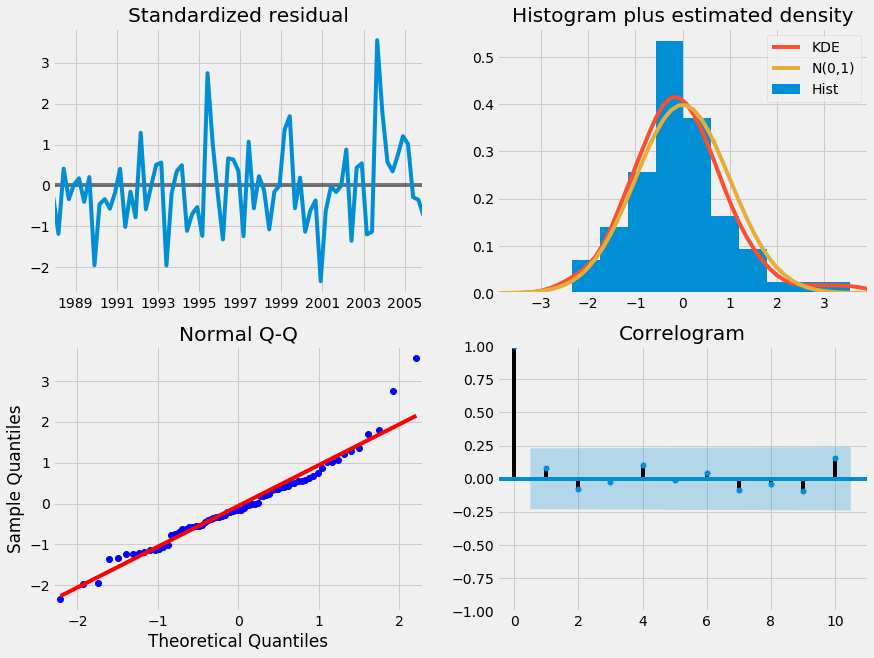

In [73]:
results.plot_diagnostics(figsize=(13, 10))
plt.show()

In [74]:
pred = results.get_prediction(start=pd.to_datetime('2000-12-01'), dynamic=False)
pred_ci = pred.conf_int()

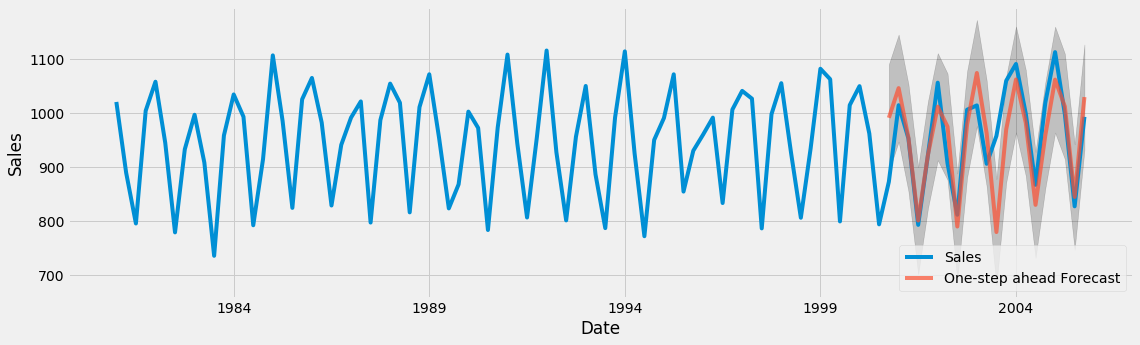

In [78]:
ax = y['1981':].plot(label='observed', figsize=(17,5))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()


In [114]:
y_forecasted = pred.predicted_mean
y_truth = y['2000-12-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth.Sales) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3821.11


In [115]:
y_forecasted

2000-12-01     990.819148
2001-03-01    1045.885336
2001-06-01     954.085899
2001-09-01     800.447317
2001-12-01     922.421347
2002-03-01    1011.444158
2002-06-01     974.335494
2002-09-01     789.338197
2002-12-01     978.627602
2003-03-01    1073.859537
2003-06-01     962.179972
2003-09-01     779.117128
2003-12-01     969.219491
2004-03-01    1061.853575
2004-06-01     981.676502
2004-09-01     829.511941
2004-12-01     958.345429
2005-03-01    1061.594385
2005-06-01    1011.721105
2005-09-01     844.190497
2005-12-01    1029.235922
Freq: QS-DEC, dtype: float64

In [105]:
y_truth

,Sales
Month,
2000-12-01,872.3
2001-03-01,1014.2
2001-06-01,952.6
2001-09-01,792.4
2001-12-01,922.3
2002-03-01,1055.9
2002-06-01,906.2
2002-09-01,811.2
2002-12-01,1005.8


In [108]:
y_forecasted - y_truth

,2000-12-01 00:00:00,2001-03-01 00:00:00,2001-06-01 00:00:00,2001-09-01 00:00:00,2001-12-01 00:00:00,2002-03-01 00:00:00,2002-06-01 00:00:00,2002-09-01 00:00:00,2002-12-01 00:00:00,2003-03-01 00:00:00,...,2003-12-01 00:00:00,2004-03-01 00:00:00,2004-06-01 00:00:00,2004-09-01 00:00:00,2004-12-01 00:00:00,2005-03-01 00:00:00,2005-06-01 00:00:00,2005-09-01 00:00:00,2005-12-01 00:00:00,Sales
Month,,,,,,,,,,,,,,,,,,,,,
2000-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2000-12-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

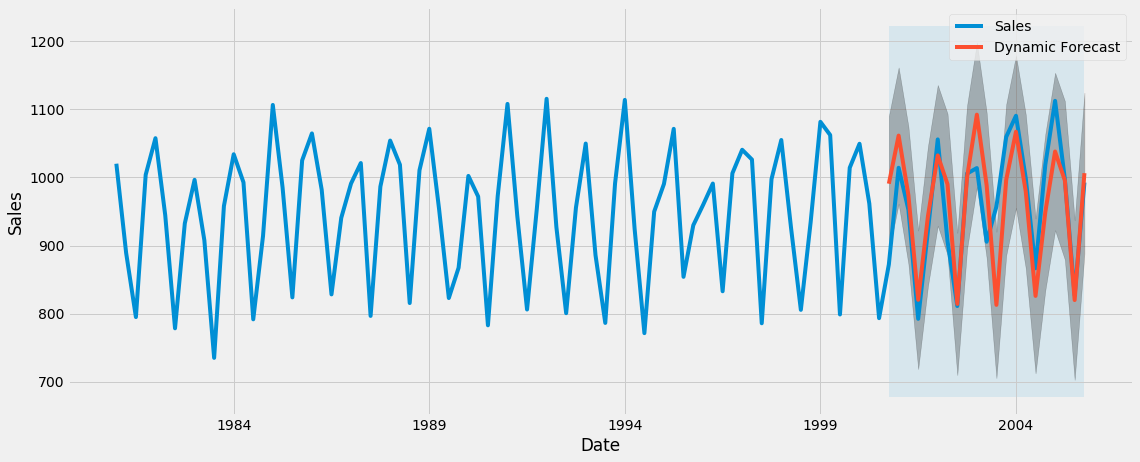

In [61]:
ax = y['1981':].plot(label='observed', figsize=(17, 7))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-12-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [62]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2000-12-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2000-12-01 00:00:00   NaN
2001-03-01 00:00:00   NaN
2001-06-01 00:00:00   NaN
2001-09-01 00:00:00   NaN
2001-12-01 00:00:00   NaN
2002-03-01 00:00:00   NaN
2002-06-01 00:00:00   NaN
2002-09-01 00:00:00   NaN
2002-12-01 00:00:00   NaN
2003-03-01 00:00:00   NaN
2003-06-01 00:00:00   NaN
2003-09-01 00:00:00   NaN
2003-12-01 00:00:00   NaN
2004-03-01 00:00:00   NaN
2004-06-01 00:00:00   NaN
2004-09-01 00:00:00   NaN
2004-12-01 00:00:00   NaN
2005-03-01 00:00:00   NaN
2005-06-01 00:00:00   NaN
2005-09-01 00:00:00   NaN
2005-12-01 00:00:00   NaN
Sales                 NaN
dtype: float64


In [90]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=300)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

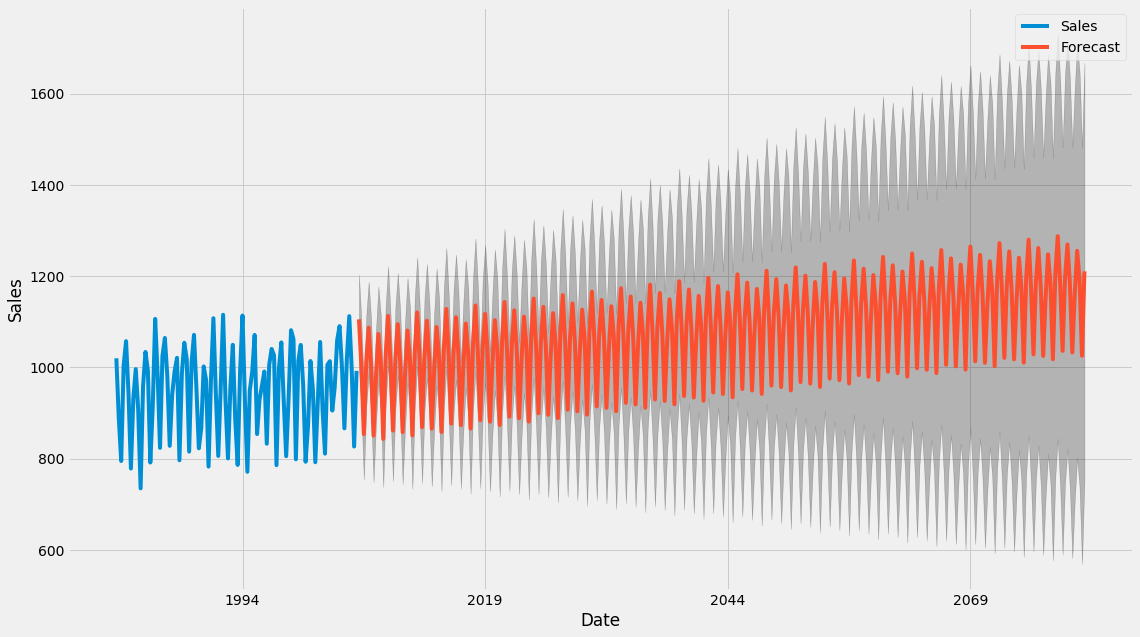

In [91]:
ax = y.plot(label='observed', figsize=(17, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()